# UN Datathon

### Data
+ Closest_Wind_to_Fire_Line.csv
  + Dataset with the data of the active wildfire and the closest weather station
+ driving_line_fire.csv
  + Dataset with the data of the active wildfire and the closest drivable fire station
+ line_export.csv
  + Dataset with the data of the active wildfire and the closest fire station (radius distance)

### Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analysing Active Wildfire Distance from Fire Station

In [61]:
gis_data = pd.read_csv('line_export.csv')

columns = ['To_CUSTODIAN_ORG_DESCRIPTION', 'To_SUPPLIED_SOURCE_ID_IND', 'To_MAILING_ADDRESS', 'To_BUSINESS_CATEGORY_DESCRIPTIO', 'To_BUSINESS_CATEGORY_CLASS','To_OCCUPANT_TYPE_DESCRIPTION', 'To_DATE_UPDATED', 'To_DESCRIPTION', 'To_STREET_ADDRESS','To_CONTACT_EMAIL','To_PHYSICAL_ADDRESS', 'To_CONTACT_PHONE','To_CONTACT_FAX','To_WEBSITE_URL', 'From_GlobalID', 'To_POSTAL_CODE', 'From_Agency', 'From_Time_Zone', 'To_IMAGE_URL', 'To_KEYWORDS', 'To_SITE_GEOCODED_IND', 'To_RESPONDER_FACILITY_TYPE', 'To_RESPONDER_GROUP_TYPE', 'To_SE_ANNO_CAD_DATA']

gis_data = gis_data.drop(columns = columns)

In [62]:
summary = round(gis_data[['From_Hectares__Ha_','Total_Kilometers']].describe(),2)
summary.columns = ['Fire Area Hectares', 'Distance Closest Fire Station']
summary

,Fire Area Hectares,Distance Closest Fire Station
count,216.00,216.00
mean,10023.27,63.85
std,51747.72,44.62
min,0.00,0.74
25%,9.56,28.66
50%,234.00,53.14
75%,1951.50,90.07
max,619072.00,239.54


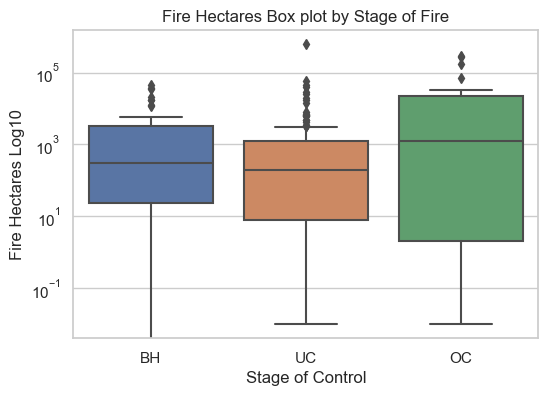

'\nOC: Out of Control\nUC: Under Control\nBH: Bein held\n'

In [63]:
# Define the order of categories on the x-axis
category_order = ['BH', 'UC', 'OC']

# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Create a box plot by category with specified order on the x-axis using Seaborn
plt.figure(figsize=(6, 4))  # Optional: set the size of the plot
sns.boxplot(x='From_Stage_of_Control', y='From_Hectares__Ha_', data=gis_data, order=category_order)

# Set labels for x and y axes
plt.xlabel('Stage of Control')
plt.ylabel('Fire Hectares Log10')
plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the title of the plot
plt.title('Fire Hectares Box plot by Stage of Fire')

plt.savefig('fireHectares_boxplot.png')

# Display the plot
plt.show()

'''
OC: Out of Control
UC: Under Control
BH: Bein held
'''

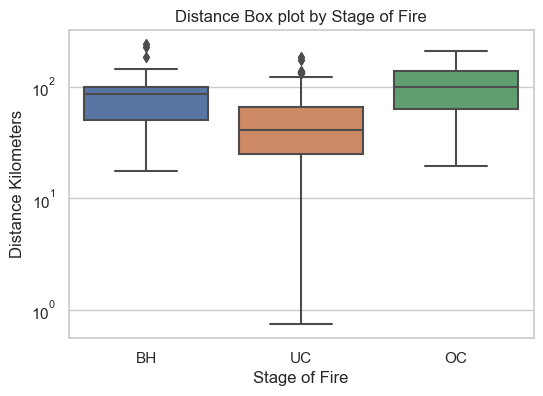

'\nOC: Out of Control\nUC: Under Control\nBH: Bein held\n'

In [64]:
# Define the order of categories on the x-axis
category_order = ['BH', 'UC', 'OC']

# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Create a box plot by category with specified order on the x-axis using Seaborn
plt.figure(figsize=(6, 4))  # Optional: set the size of the plot
sns.boxplot(x='From_Stage_of_Control', y='Total_Kilometers', data=gis_data, order=category_order)

# Set labels for x and y axes
plt.xlabel('Stage of Fire')
plt.ylabel('Distance Kilometers')
plt.yscale('log')

# Set the title of the plot
plt.title('Distance Box plot by Stage of Fire')

plt.savefig('distanceKM_boxplot.png')


# Display the plot
plt.show()

'''
OC: Out of Control
UC: Under Control
BH: Bein held
'''

### Analysing Active Wildfires with and without direct access

In [75]:
driving_data = pd.read_csv('driving_line_fire.csv')

gis_data['Drivable'] = gis_data['From_ID'].isin(driving_data['From_ID'])

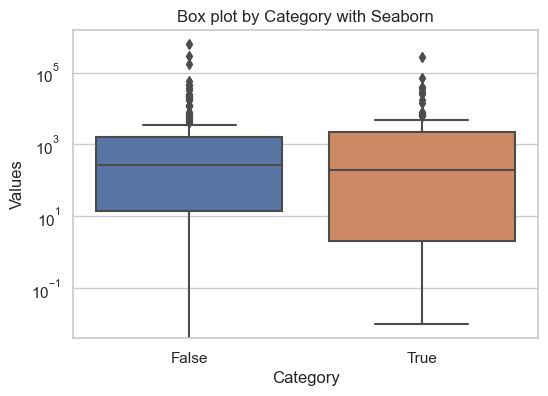

'\nOC: Out of Control\nUC: Under Control\nBH: Bein held\n'

In [77]:

# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Create a box plot by category with specified order on the x-axis using Seaborn
plt.figure(figsize=(6, 4))  # Optional: set the size of the plot
sns.boxplot(x='Drivable', y='From_Hectares__Ha_', data=gis_data)

# Set labels for x and y axes
plt.xlabel('Category')
plt.ylabel('Values')
plt.yscale('log')

# Set the title of the plot
plt.title('Box plot by Category with Seaborn')

# Display the plot
plt.show()

'''
OC: Out of Control
UC: Under Control
BH: Bein held
'''

In [89]:

# Create a contingency table
contingency_table = pd.crosstab(index=gis_data['Drivable'], columns=gis_data['From_Stage_of_Control'], normalize='columns')

contingency_table = round(contingency_table, 2)
print(contingency_table)



From_Stage_of_Control    BH    OC    UC
Drivable                               
False                  0.69  0.69  0.67
True                   0.31  0.31  0.33


In [92]:
print("Proportion of the Active Wildfires without direct access")

round(1-gis_data['Drivable'].mean(),2)

Proportion of the Active Wildfires without direct access


0.68